In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [3]:
# import trip data
df = pd.read_csv('data/citibike_ZIP.csv')

In [4]:
# import zip code file
zip_shp = gpd.read_file('nyc_zip/ZIP_CODE_040114.shp')[['ZIPCODE', 'geometry']]
zip_shp['ZIPCODE'] = zip_shp['ZIPCODE'].astype(int)

In [5]:
# find count of trips originating in each zip code
zip_count = df.groupby('zip_start', as_index=False)[['bikeid']].count()
zip_count.columns = ['ZIPCODE','trips_count']
zip_count

,ZIPCODE,trips_count
0,83,70803
1,10001,63816
2,10002,78029
3,10003,92930
4,10004,10921
...,...,...
67,11237,13659
68,11238,35123
69,11249,32680
70,11251,3706


In [6]:
# find average duration for trips originating in each zip code
zip_dur = df.groupby('zip_start', as_index=False)[['tripduration']].mean()
zip_dur.columns = ['ZIPCODE','avg_duration']
zip_dur

,ZIPCODE,avg_duration
0,83,23.918332
1,10001,18.239509
2,10002,19.065129
3,10003,17.928137
4,10004,26.335287
...,...,...
67,11237,22.287264
68,11238,22.577749
69,11249,22.049322
70,11251,20.113887


In [7]:
# merge with shapefile
zip_shp = zip_shp.merge(
    zip_count, 
    on= 'ZIPCODE',
    how='left')
zip_shp.head()

,ZIPCODE,geometry,trips_count
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",NaN
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",NaN
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",NaN
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",9237.0
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",NaN


In [8]:
zip_shp = zip_shp.merge(
    zip_dur, 
    on='ZIPCODE',
    how='left')
zip_shp.head()

,ZIPCODE,geometry,trips_count,avg_duration
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",NaN,NaN
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",NaN,NaN
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",NaN,NaN
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",9237.0,30.995883
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",NaN,NaN


In [9]:
# fill in 0 for zipcodes that have no trips
zip_shp['trips_count'].fillna(0, inplace=True)
zip_shp['avg_duration'].fillna(0, inplace=True)

[]

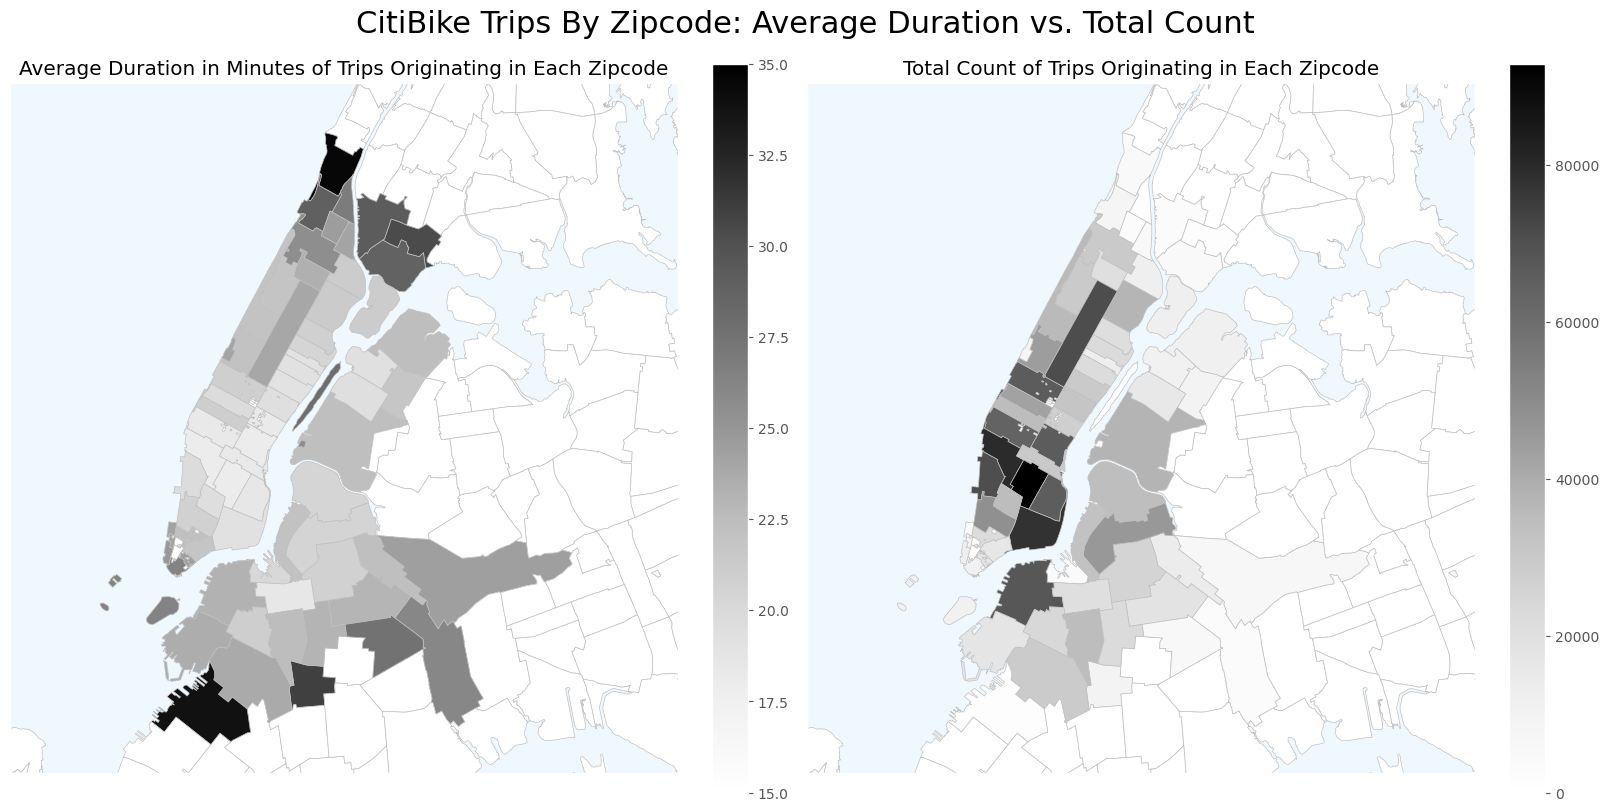

In [19]:
# choropleths comparing trip count vs duration

from matplotlib.colors import Normalize
norm = Normalize(vmin=15, vmax=35)

fig, (ax1, ax2) = plt.subplots(1,2, 
                        figsize=(16, 8),
                        sharex=False,
                        sharey=False,
                        constrained_layout=True)
fig.suptitle('CitiBike Trips By Zipcode: Average Duration vs. Total Count', fontsize=22)

zip_shp.plot(ax=ax1, column= 'avg_duration', cmap='Greys', norm=norm, edgecolor = 'silver', legend=True)

ax1.title.set_text('Average Duration in Minutes of Trips Originating in Each Zipcode')
ax1.set_xlim(960000, 1042546)
ax1.set_ylim(170056, 255352)
ax1.set_facecolor("aliceblue")
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

zip_shp.plot(ax=ax2, column='trips_count', cmap='Greys', edgecolor = 'silver', legend=True)

ax2.title.set_text('Total Count of Trips Originating in Each Zipcode')
ax2.set_xlim(960000, 1042546)
ax2.set_ylim(170056, 255352)
ax2.set_facecolor("aliceblue")
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])